# Práctica 1: Análisis exploratorio de dataset
## Vladimir García Loginova

## Análisis exploratorio del dataset "Rain in Australia" de kaggle

Link del dataset: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

### Importamos paqueterías, leemos el dataframe y vemos características importantes

In [1]:
# importe de pauqterías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lectura y visulaización de datos
file="weatherAUS.csv"
df=pd.read_csv(file,encoding = "ISO-8859-1")
print(df.columns.values)
cities=df.Location.unique()
print(cities)
print(df)

['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine'
 'WindGustDir' 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm'
 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RainToday' 'RainTomorrow']
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6  

### Primer análisis exploratorio
El primer análisis consiste en solo ver la variable de precipitación ('Rainfall'), pero como son datos diarios que pueden tardar mucho en graficarse, se utilizará el promedio diario mensual, así podremos reducir el costo de graficación y veremos mejor el patrón anual de la precipitación. En el código debajo se obtienen los arrays con los promedios diarios por mes de la precipitación por ciudad y se guardan en un diccionario.

In [3]:
#vemos que los datos de fechas son strings por lo que convertimos la columna de fechas a objetos datetime
print(type(df.Date.values[0]))
datetimes=pd.to_datetime(df.Date.values)
df.Date=datetimes.values
years=np.sort(df.Date.dt.year.unique())
months=np.arange(1,13)

#Se crea dictionario de ciudades y lo inicializamos con objetos vacios 
montly_rain_cities={i:None for i in cities}

#Aquí se cran un nunmpy array por ciudad que guarda la precitación diaria promedio por mes en una matriz de 11x12, donde las filas
# son los anios (2007 a 2018) y las columna los meses. El numpy array se asigna (como value) a la key correspondiente que es la ciudad.
for c in cities:
    print(c)
    years_monthly_rain=[]
    for y in years:
        month_mean_rain=[]
        for m in months:
            m_rain=np.nanmean(df.loc[(df.Date.dt.year==y)&(df.Date.dt.month==m)\
                                    &(df.Location==c), 'Rainfall'].values)
            month_mean_rain.append(m_rain)
        years_monthly_rain.append(month_mean_rain)
    montly_rain_cities[c]=np.array(years_monthly_rain)
#print(montly_rain_cities)

<class 'str'>
Albury


/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_960/1233526688.py:19: RuntimeWarning: Mean of empty slice
  m_rain=np.nanmean(df.loc[(df.Date.dt.year==y)&(df.Date.dt.month==m)\


BadgerysCreek
Cobar
CoffsHarbour
Moree
Newcastle
NorahHead
NorfolkIsland
Penrith
Richmond
Sydney
SydneyAirport
WaggaWagga
Williamtown
Wollongong
Canberra
Tuggeranong
MountGinini
Ballarat
Bendigo
Sale
MelbourneAirport
Melbourne
Mildura
Nhil
Portland
Watsonia
Dartmoor
Brisbane
Cairns
GoldCoast
Townsville
Adelaide
MountGambier
Nuriootpa
Woomera
Albany
Witchcliffe
PearceRAAF
PerthAirport
Perth
SalmonGums
Walpole
Hobart
Launceston
AliceSprings
Darwin
Katherine
Uluru


### Se grafica la precipitación diaria promedio por mes con el siguiente codigo

DatetimeIndex(['2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30',
               '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
               '2007-09-30', '2007-10-31',
               ...
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', length=132, freq='ME')
['2007-01-31T00:00:00.000000000' '2008-01-31T00:00:00.000000000'
 '2009-01-31T00:00:00.000000000' '2010-01-31T00:00:00.000000000'
 '2011-01-31T00:00:00.000000000' '2012-01-31T00:00:00.000000000'
 '2013-01-31T00:00:00.000000000' '2014-01-31T00:00:00.000000000'
 '2015-01-31T00:00:00.000000000' '2016-01-31T00:00:00.000000000'
 '2017-01-31T00:00:00.000000000']
[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


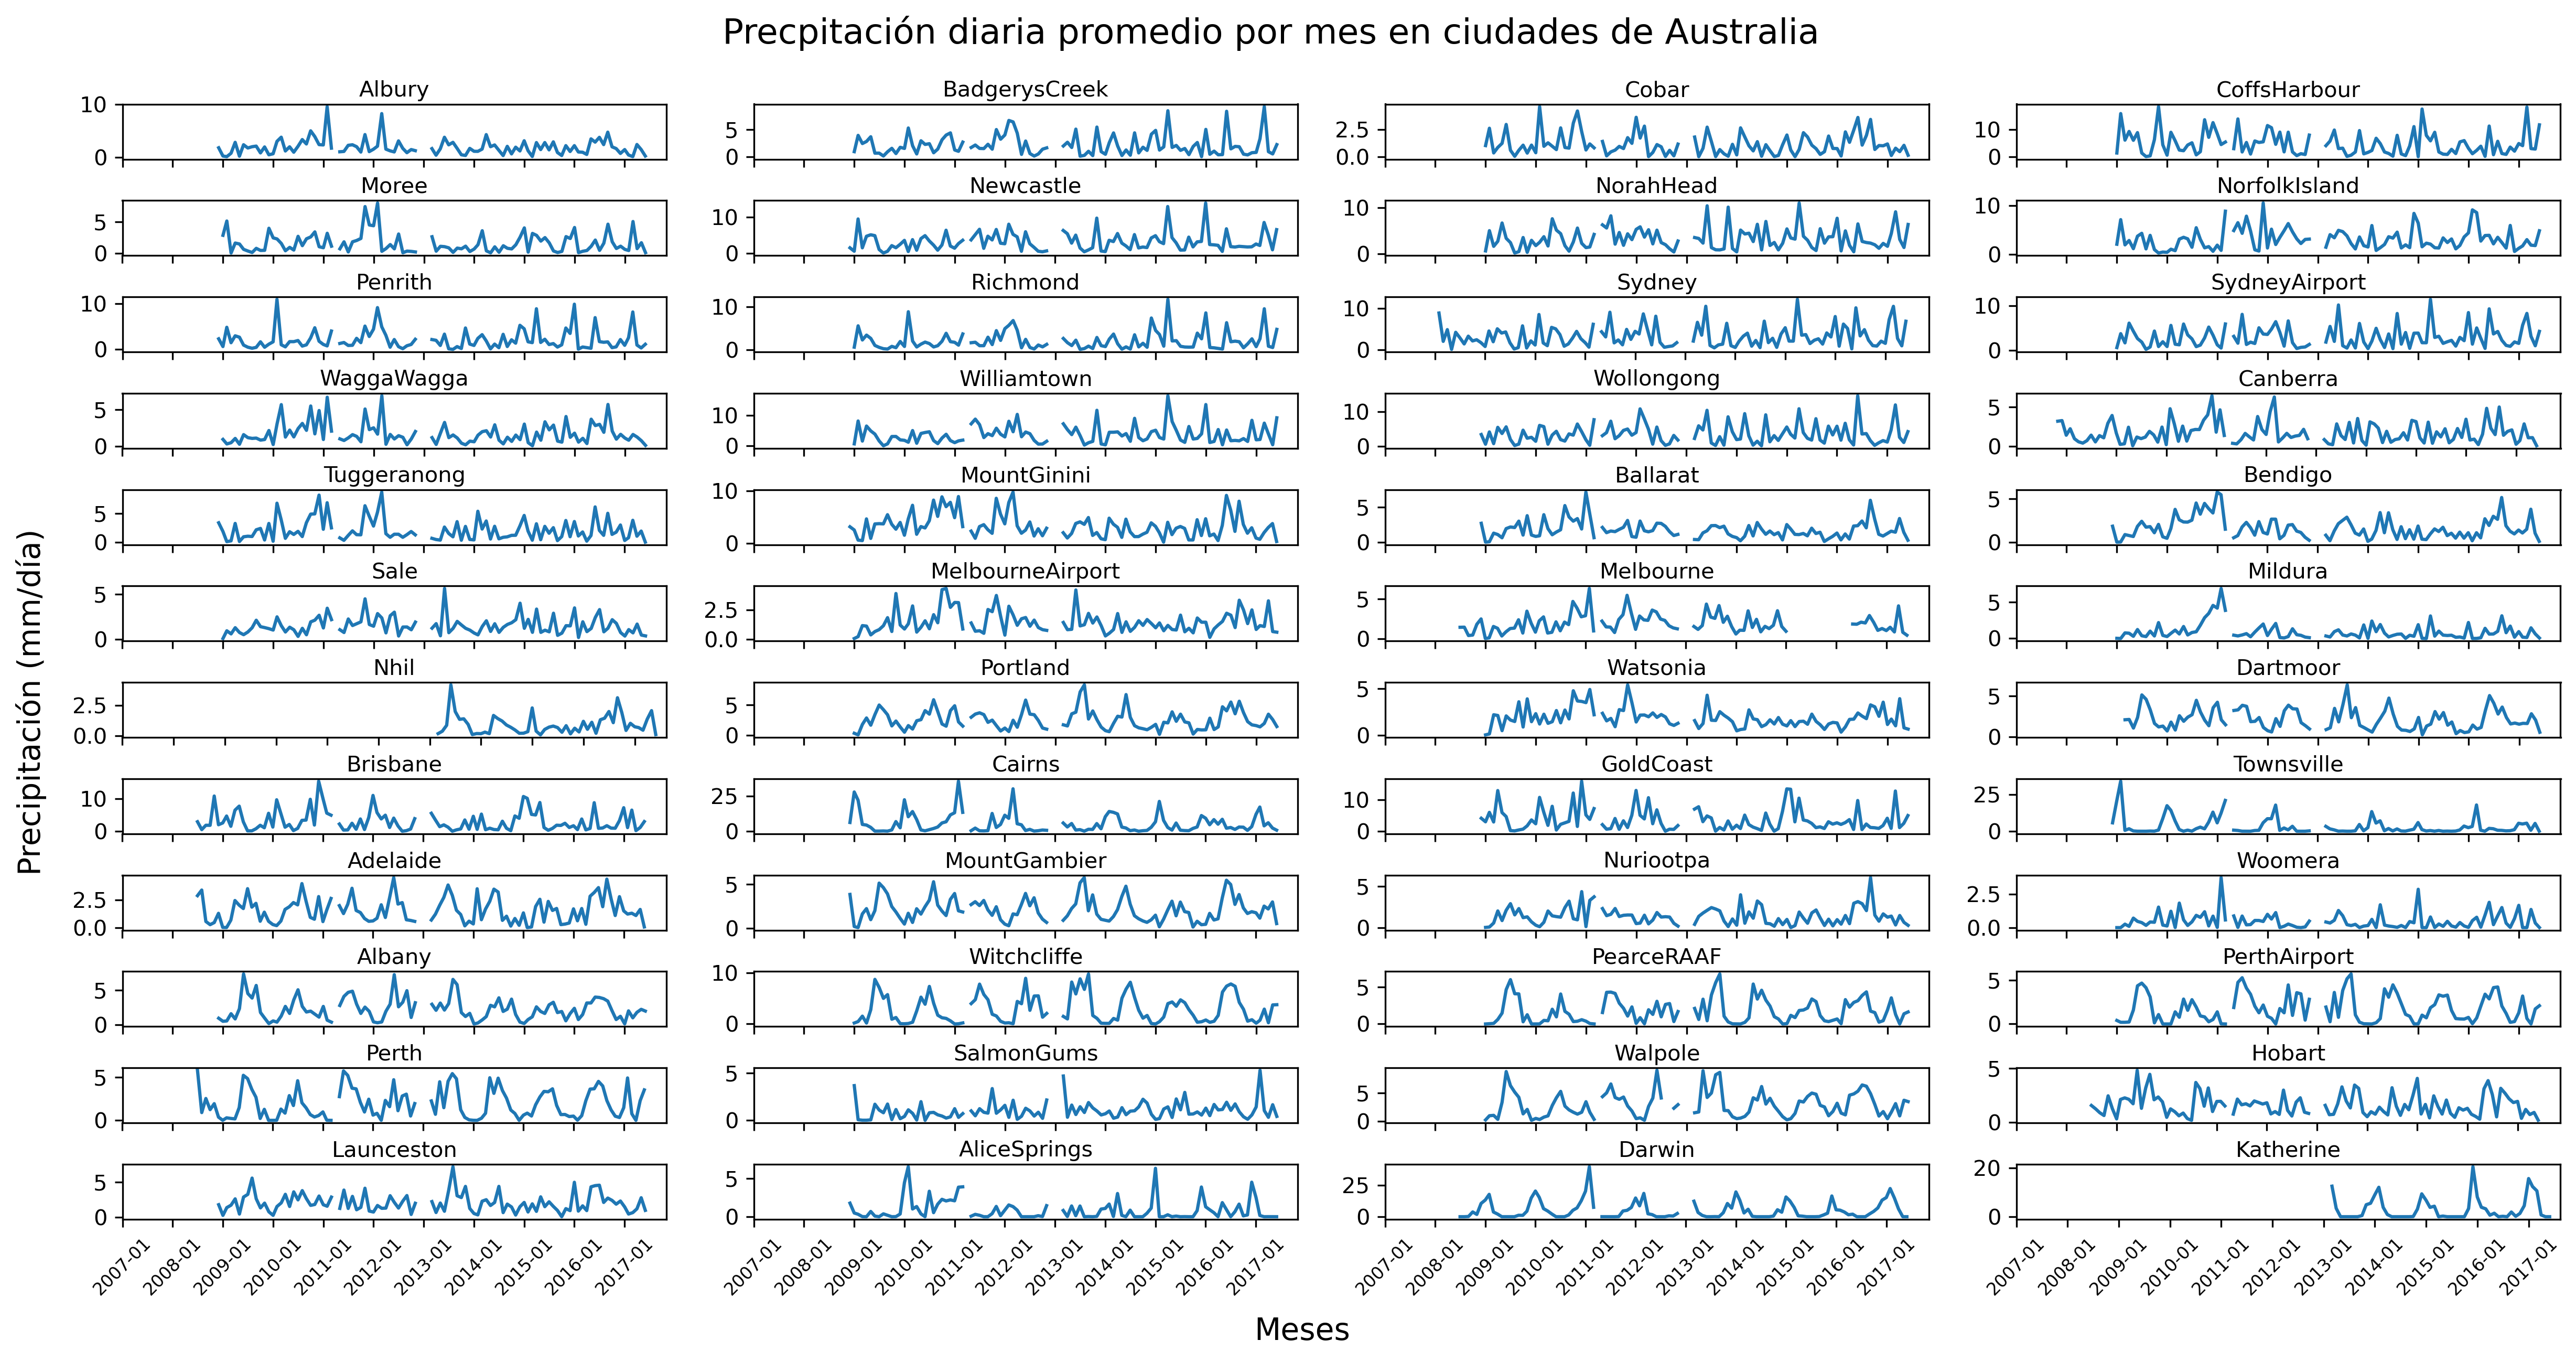

In [4]:
#datetime array para la grafica
df_dt = pd.date_range('2007-01-01', '2018-01-01', freq='ME')
years=df_dt.year.unique().values
print(df_dt)
ind_m=[ind for ind,i in enumerate(df_dt) if i.month==1]
print(df_dt.values[ind_m])
#print(len(cities))
df_dt.values[ind_m]
print(np.arange(years[0],years[-1]+1))
#omito ultima ciudad para tener una matriz para poder representar mejor los datos
cities2=cities[:-1]
fig = plt.figure(figsize=(20,10),dpi=300)
for ind,city in enumerate(cities2):
    plt.subplot((int(len(cities)/4))+1,4, ind+1)
    plt.plot(df_dt.values,np.hstack(montly_rain_cities[city]))
    plt.xticks(df_dt.values[ind_m],[str(i)+'-01' for i in np.arange(years[0],years[-1]+1)],\
               rotation=45,fontsize=8)
    plt.title(city,fontsize=10,y=0.9)
    ax=plt.gca()
    if ind not in np.arange(len(cities2)-4,len(cities2)+1):
        ax.tick_params(labelbottom=False) 
fig.text(0.49, 0.925,'Precpitación diaria promedio por mes en ciudades de Australia',ha='center', va='center',fontsize=16)
fig.text(0.5, 0.1, 'Meses', ha='center', va='center',fontsize=14)
fig.text(0.096, 0.5, 'Precipitación (mm/día)', ha='center', va='center', rotation='vertical',fontsize=14)
plt.subplots_adjust(wspace=0.16,hspace=0.75)
plt.show()

Podemos ver en la imagen que muchas ciudades (puntos de medición) carecen de datos en varias épocas, también se observa que son pocos los lugares donde comienzan los datos a finales de 2007 o principios de 2008.
De igual manera, se nota que en muchos lugares (como Sydney o Ballarat) el patron del ciclo anual de la precipitación no es tan claro como en otros (por ejemplo, Perth o Witchcliffe).
Por lo anterior, se escogen 3 ciudades con patrones distintos de precipitación (para que no haya sesgos), las cuales no tengan mucha intermitencia en las mediciones (que tenga al menos 6 anios completos), y que sean puntos lejanos entre si.
Las ciudades elegidas son: Perth, Sydney y Darwin, que son ciudades importantes de Australia. Con estos 3 lugares se realizará los siguientes análisis.

### Graficamos ahora el promedio mensual de la precipitación diaria de todos los anios (2007-2018) en las 3 ciudades, para obtener la climatología de la precipitación 

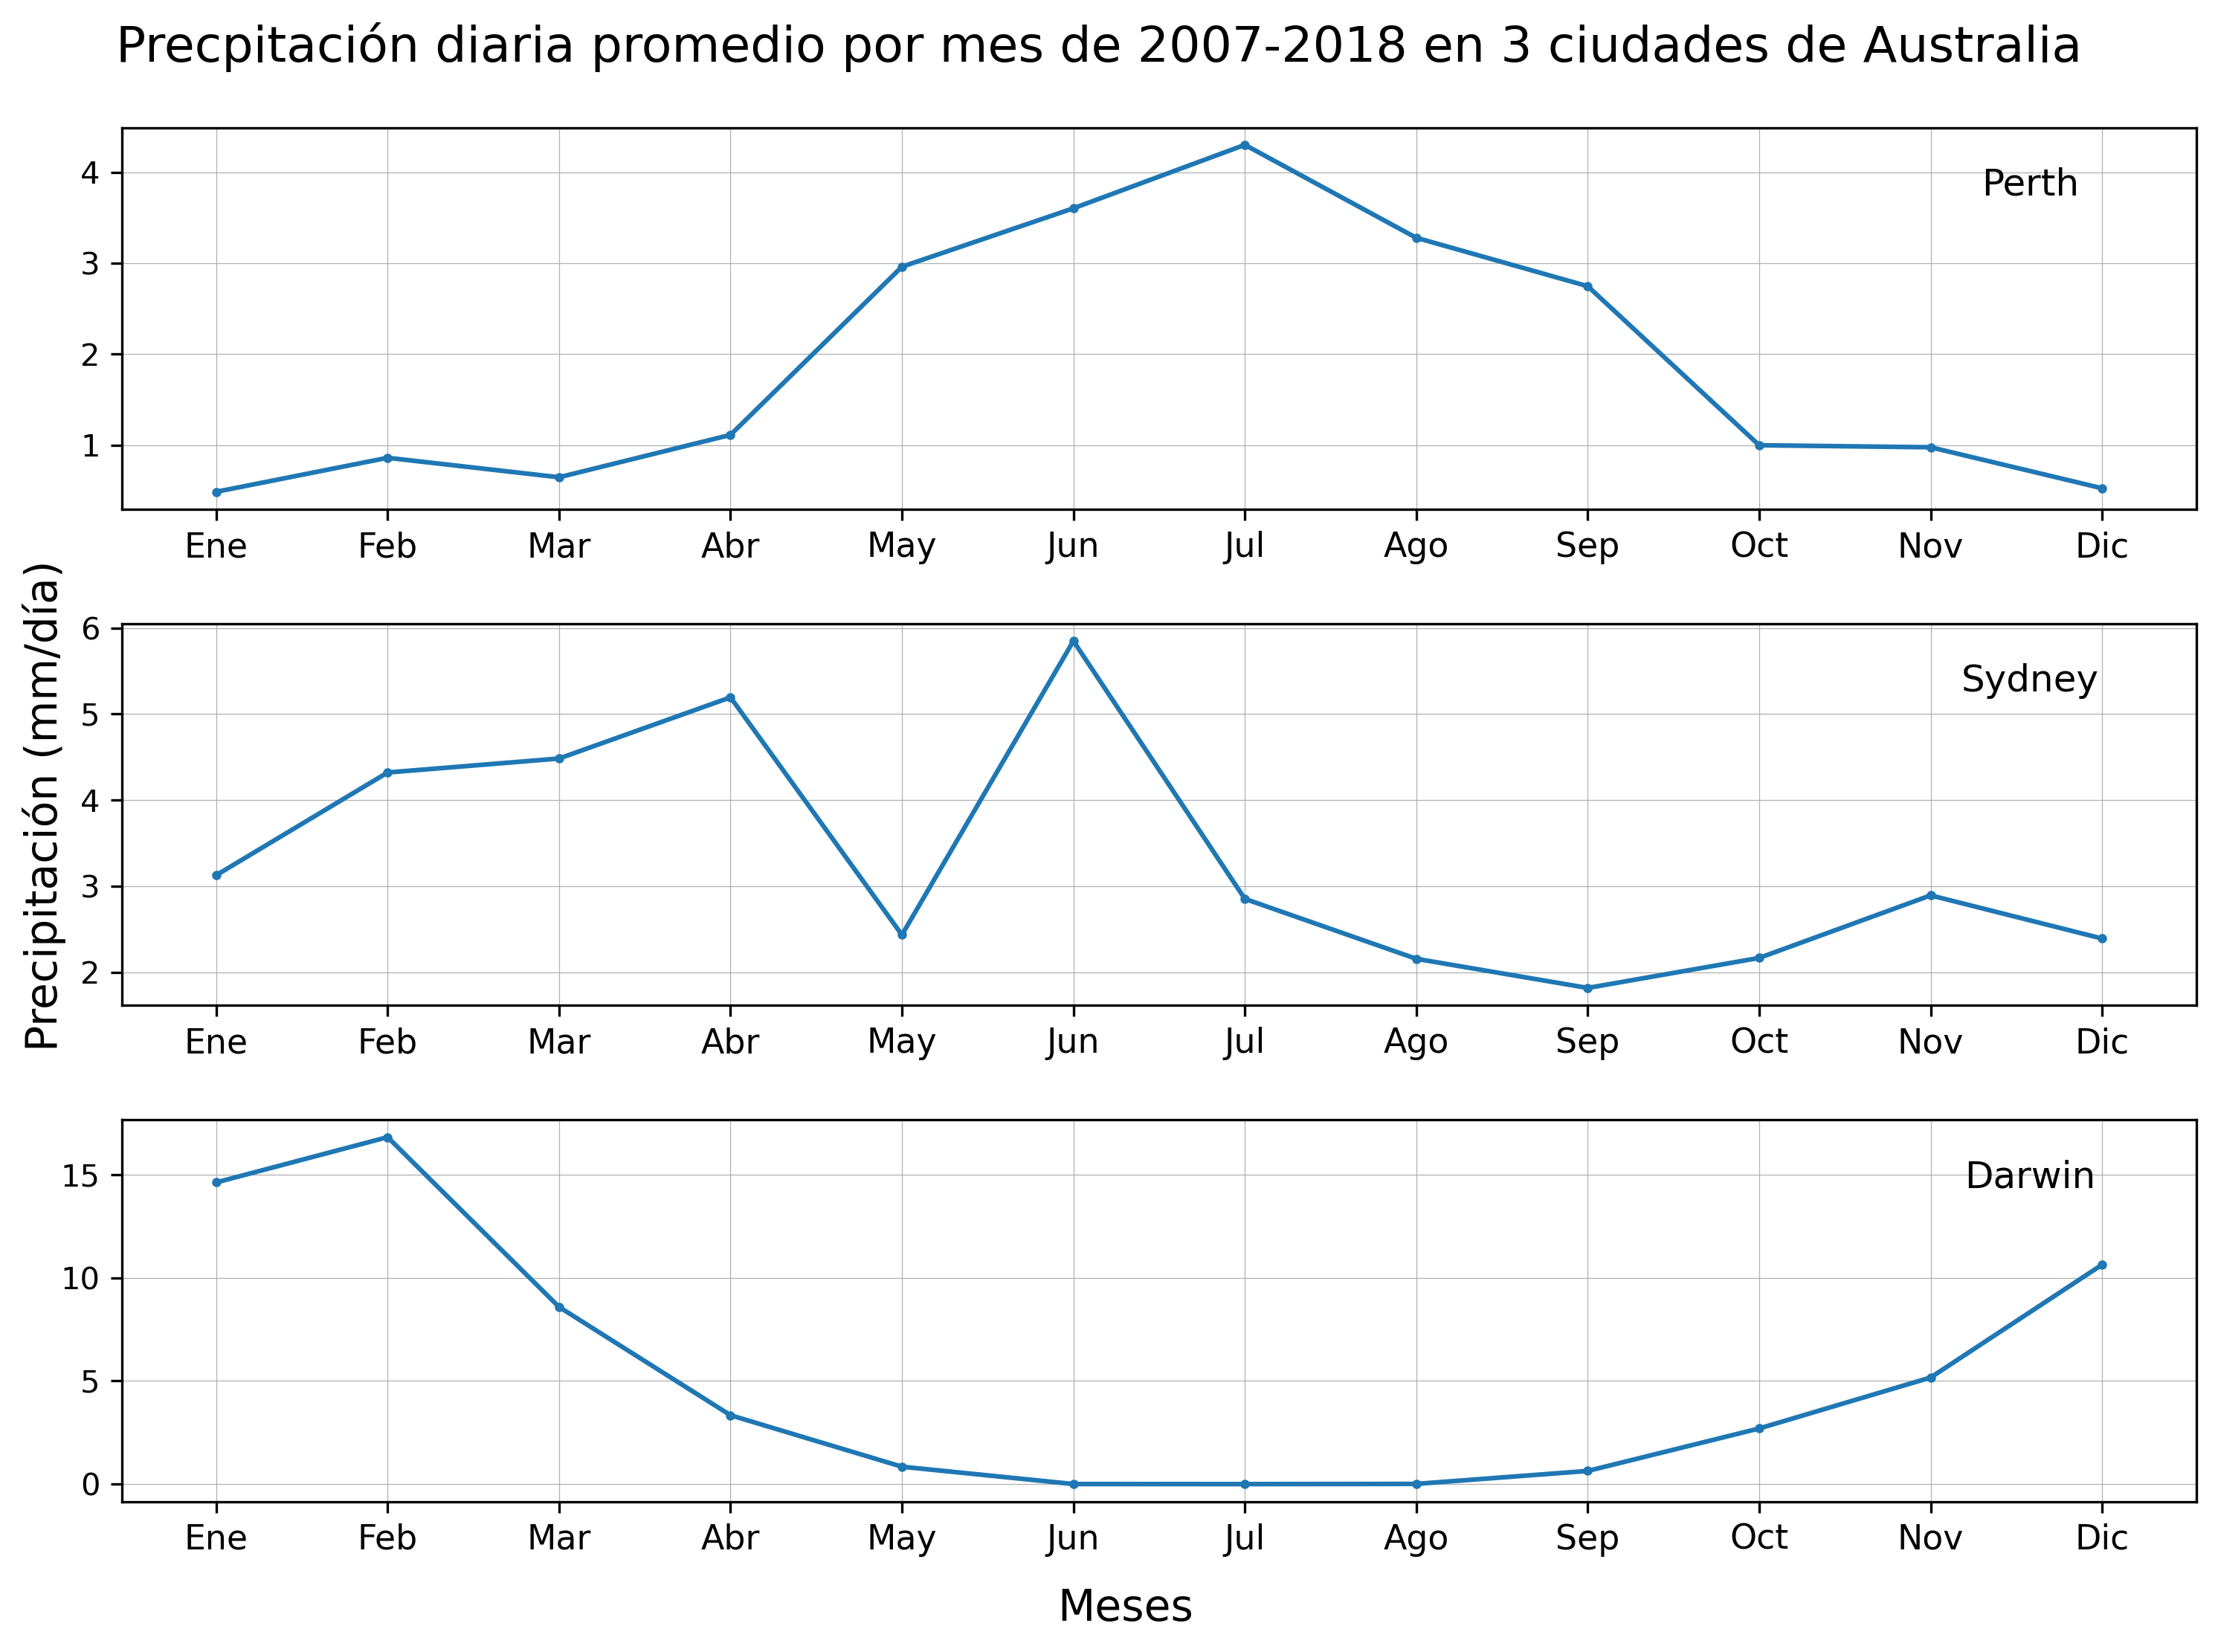

In [5]:
#Graficamos ahora el promedio diario mensual de todos los anios, para ver el comportamiento climatológico de la precipitación
cities3=["Perth", "Sydney","Darwin"]
fig = plt.figure(figsize=(12,8),dpi=300)
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',\
      'Agosto','Septiembre','Octubre','Noviembre','Diciembre']
meses2=[mes[0:3] for mes in meses]
xm=np.arange(1,13)
for ind,city in enumerate(cities3):
    plt.subplot(3,1, ind+1)
    plt.plot(xm,np.nanmean(montly_rain_cities[city],axis=0),marker='o',markersize=2)
    ax=plt.gca()
    plt.text(0.92,0.85,city, size=12, va='center',ha='center',transform=ax.transAxes)
    plt.xticks(xm,meses2,fontsize=11)
    #plt.title(city,fontsize=10,y=0.9)
    ax.xaxis.grid(True, which='major',linewidth=0.3,zorder=0)
    ax.yaxis.grid(True,which='both',linewidth=0.3,zorder=0)
fig.text(0.49, 0.925,'Precpitación diaria promedio por mes de 2007-2018 en 3 ciudades de Australia',ha='center', va='center',fontsize=16)
fig.text(0.5, 0.05, 'Meses', ha='center', va='center',fontsize=14)
fig.text(0.096, 0.5, 'Precipitación (mm/día)', ha='center', va='center', rotation='vertical',fontsize=14)
plt.subplots_adjust(hspace=0.3)
plt.show()


Observamos varias cosas interesantes. Pero antes que nada debe aclararse que el verano australiano sucede en el invierno del hemisferio norte y viceversa.

Lo primero que podemos notar es una climatología distinta para cada ciudad, consistente con su ubicación geográfica.
Darwin que se enceuntra al norte del país y dentro de los trópicos, presenta un clima tropical con lluvias en verano muy marcadas y un invierno seco (Wikipedia, 2024a), tal como es el clima en el centro y sur de México. Perth, que se encuentra en el suroeste del país, presenta un clima mediterraneo con lluvias principalmente en invierno (Wikipedia, 2024b), como el clima en Ensenada. Y por ultimo Sydney, que esta al sureste del país, parece tener un clima combinado con lluvias tanto en verano-otonio como en invierno, segun la bibliografía (Wikipedia, 2024c) los meses humedos o secos varian cada anio pero se acotan dentro de Enero a Junio. 

En segundo lugar, se observa que Darwin presenta una cantidad de precipitación considerablemente mayor que las otras ciudades, aporximadamente 3 veces mas. Esto es consistente con su ubicación y tipo de clima.

Se puede concluir que cada ciudad tiene un clima disntinto basado en sus promedio históricos de lluvia. Y que los datos del dataset son consistentes con la realidad.


Referencias

Wikipedia, 2024a. *Climate of Perth*. https://en.wikipedia.org/wiki/Climate_of_Perth

Wikipedia, 2024b. *Darwin, Northern Territory*. https://en.wikipedia.org/wiki/Darwin,_Northern_Territory

Wikipedia, 2024c. *Climate of Sydney*. https://en.wikipedia.org/wiki/Climate_of_Sydney


### Hacemos scatter plot de precipitación vs humedad relativa a las 9 am y 3pm, se espera que las variables tengan una relación

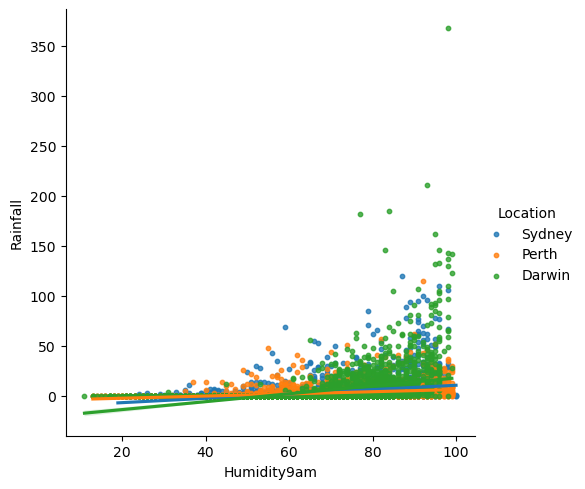

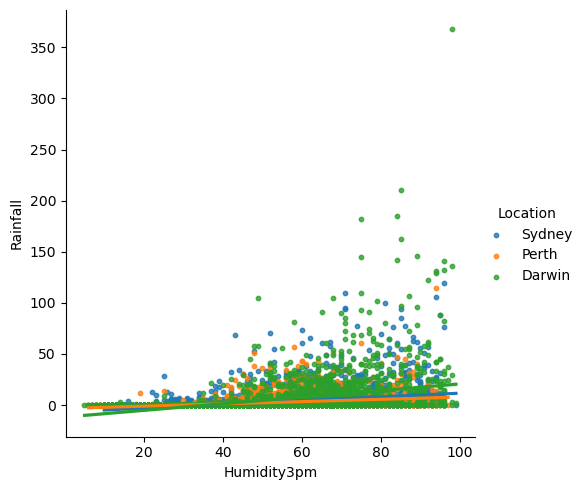

In [6]:
#se acota el dataframe a las 3 ciudades elegidas
df_3c=df.loc[df.Location.isin(["Perth", "Sydney","Darwin"])]
#se grafica con seaborn
sns.lmplot(x='Humidity9am', y='Rainfall', data=df_3c,
           fit_reg=True, # No regression line
           hue='Location',scatter_kws={"s": 10}) 

sns.lmplot(x='Humidity3pm', y='Rainfall', data=df_3c,
           fit_reg=True, # No regression line
           hue='Location',scatter_kws={"s": 10})   # Color by species

Podemos notar que en efecto hay una relación directamente proporcional entre humedad relativa y precipitación en ambos casos. Y se alcanza a notar para Darwin que hay un outlier de precipitación, con un valor mayor a 350 mm, inclusive esto se puede notar desde la primer grafica de precipitación, donde en el mes 2011-01 tenemos un valor promedio extremadamente alto. Por lo que procedemos a hacer un boxplot para analizar los datos.

### Boxplot de la precipitación diaria por ciudad


<Axes: xlabel='Location', ylabel='Rainfall'>

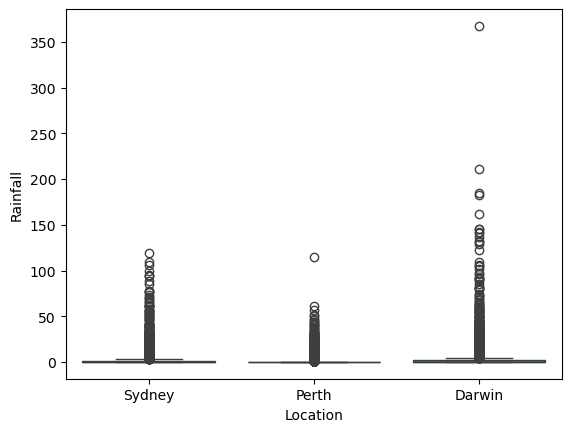

In [7]:
sns.boxplot(x="Location", y="Rainfall",data=df_3c)

Vemos que con los datos diarios hay un problema en representarlos de esta forma, debido a que muchos datos son 0 o de muy poca lluvia, por lo que se procederá a graficar nuevamente pero ahora con la precipitación diaria promedio mensual. Lo relevante de la grafica es que se nota el outlier de 350 mm en Darwin, que en su caso debe verse si es un dato anomalo o si efectivamente dicha precipitación ocurrió.

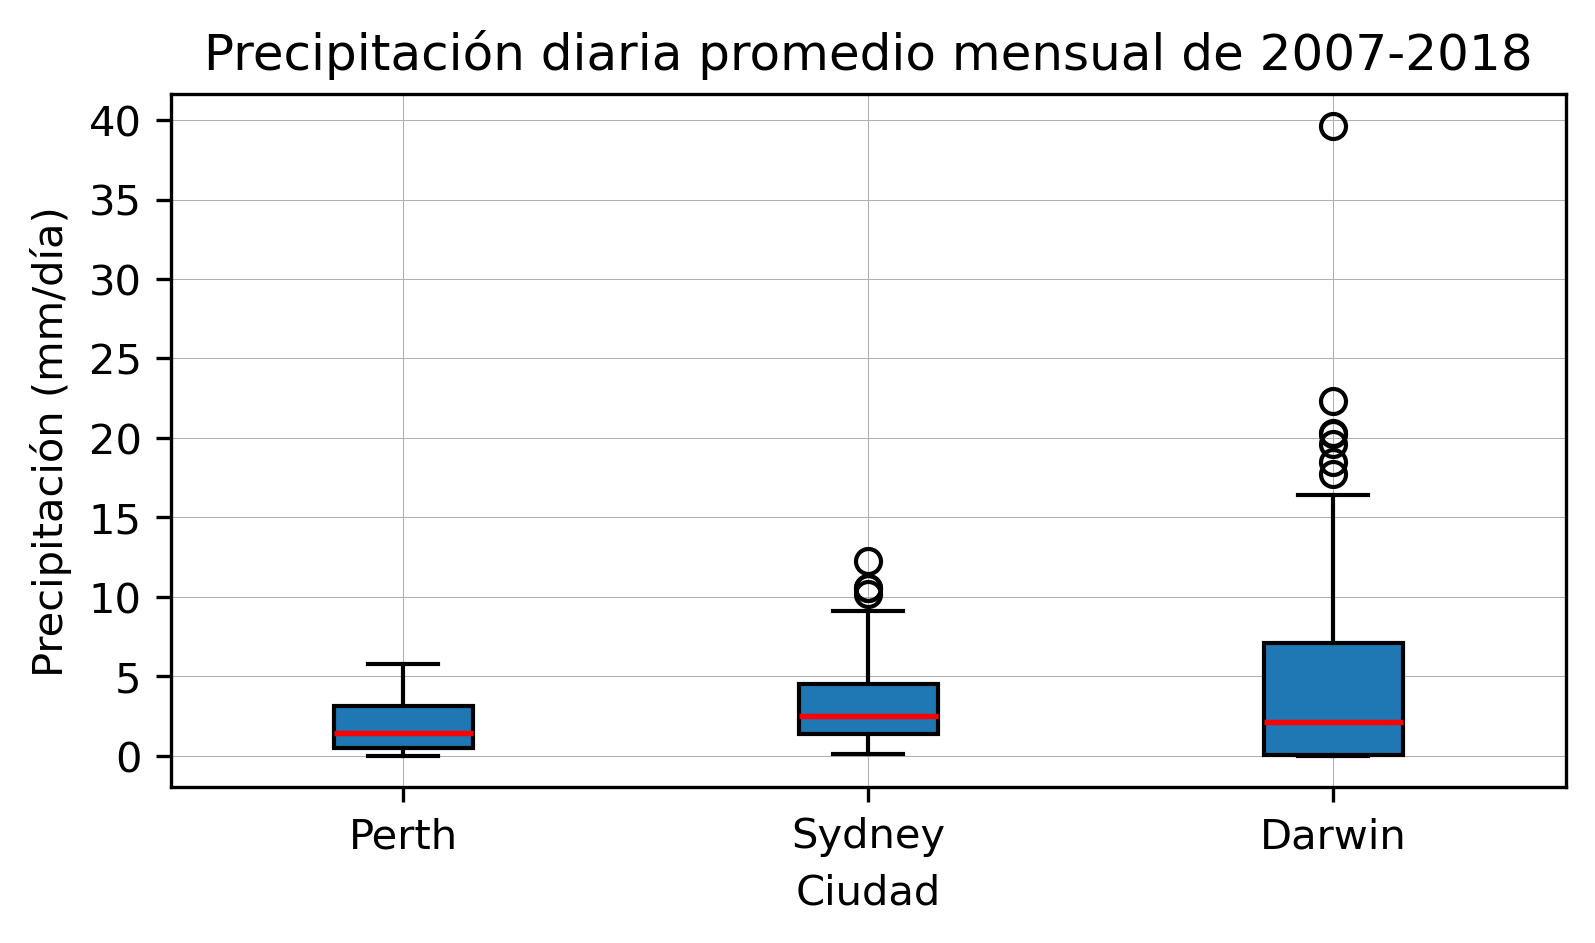

In [8]:
#guardamos en una lislta la precip prom y quitamos los valores nan para poder hacer el boxplot
rain_3cities_all_months=[]
for city in cities3:
    data=np.hstack(montly_rain_cities[city])
    data2=data[~np.isnan(data)]
    rain_3cities_all_months.append(data2)

#boxplot de precipitacion diaria promedio mensual
fig = plt.figure(figsize=(6,3),dpi=300)
medianprops = dict(linestyle='-', linewidth=1.3, color='red')
ax=plt.gca()
ax.boxplot(rain_3cities_all_months,vert=True,patch_artist=True,labels=cities3,medianprops=medianprops)
ax.grid(True,lw=0.25)
plt.yticks(np.arange(0,45,5))
plt.xlabel("Ciudad")
plt.ylabel("Precipitación (mm/día)")
plt.title("Precipitación diaria promedio mensual de 2007-2018")
plt.show()
    

En la gráfica se notan varias cosas. La primera es la diferencia en la cantidad de precipitiación, como era esperado Darwin presenta la mayor cantidad, seguido de Sydney y por último Perth. En este caso Perth se puede considerar una ciudad un tanto seca y Darwin una ciudad muy lluviosa. En segundo lugar, se nota algo interesante, las 3 ciudades comparten una mediana entre los 0 y 5 mm, esto nos habla de la consistencia en los datos y su comportamiento, independientemente de la localidad. Por último, podemos ver que Perth tiene la menor variabilidad en su climatología, mientrás que Darwin la mayor, esto no es habla de regímenes de precipitación totalmente distintos.

### Por último, se comparan diversas variables que pueden estar conectadas entre sí y que estan relacionadas con la lluvia directa o indirectamente.
Para ellos usaremos el pairplot de seaborn

        Date Location  Rainfall  Evaporation  Humidity9am  Humidity3pm  \
0    2008-02   Sydney  8.910345     5.442857    75.655172    64.551724   
1    2008-03   Sydney  2.045161     5.470968    76.516129    57.967742   
2    2008-04   Sydney  4.886667     4.303333    74.166667    58.966667   
3    2008-05   Sydney  0.096774     2.709677    74.193548    54.806452   
4    2008-06   Sydney  4.240000     2.246667    78.200000    61.900000   
..       ...      ...       ...          ...          ...          ...   
315  2017-05    Perth  2.283871     3.148387    74.419355    51.645161   
316  2017-05   Sydney  0.967742     3.326667    70.741935    50.387097   
317  2017-06   Darwin  0.000000     6.800000    48.800000    31.360000   
318  2017-06    Perth  3.520000     2.712000    74.320000    46.560000   
319  2017-06   Sydney  6.920000     2.176000    78.000000    60.280000   

       Temp9am    Temp3pm  
0    20.903448  23.203448  
1    20.177419  24.077419  
2    16.563333  20.363333  

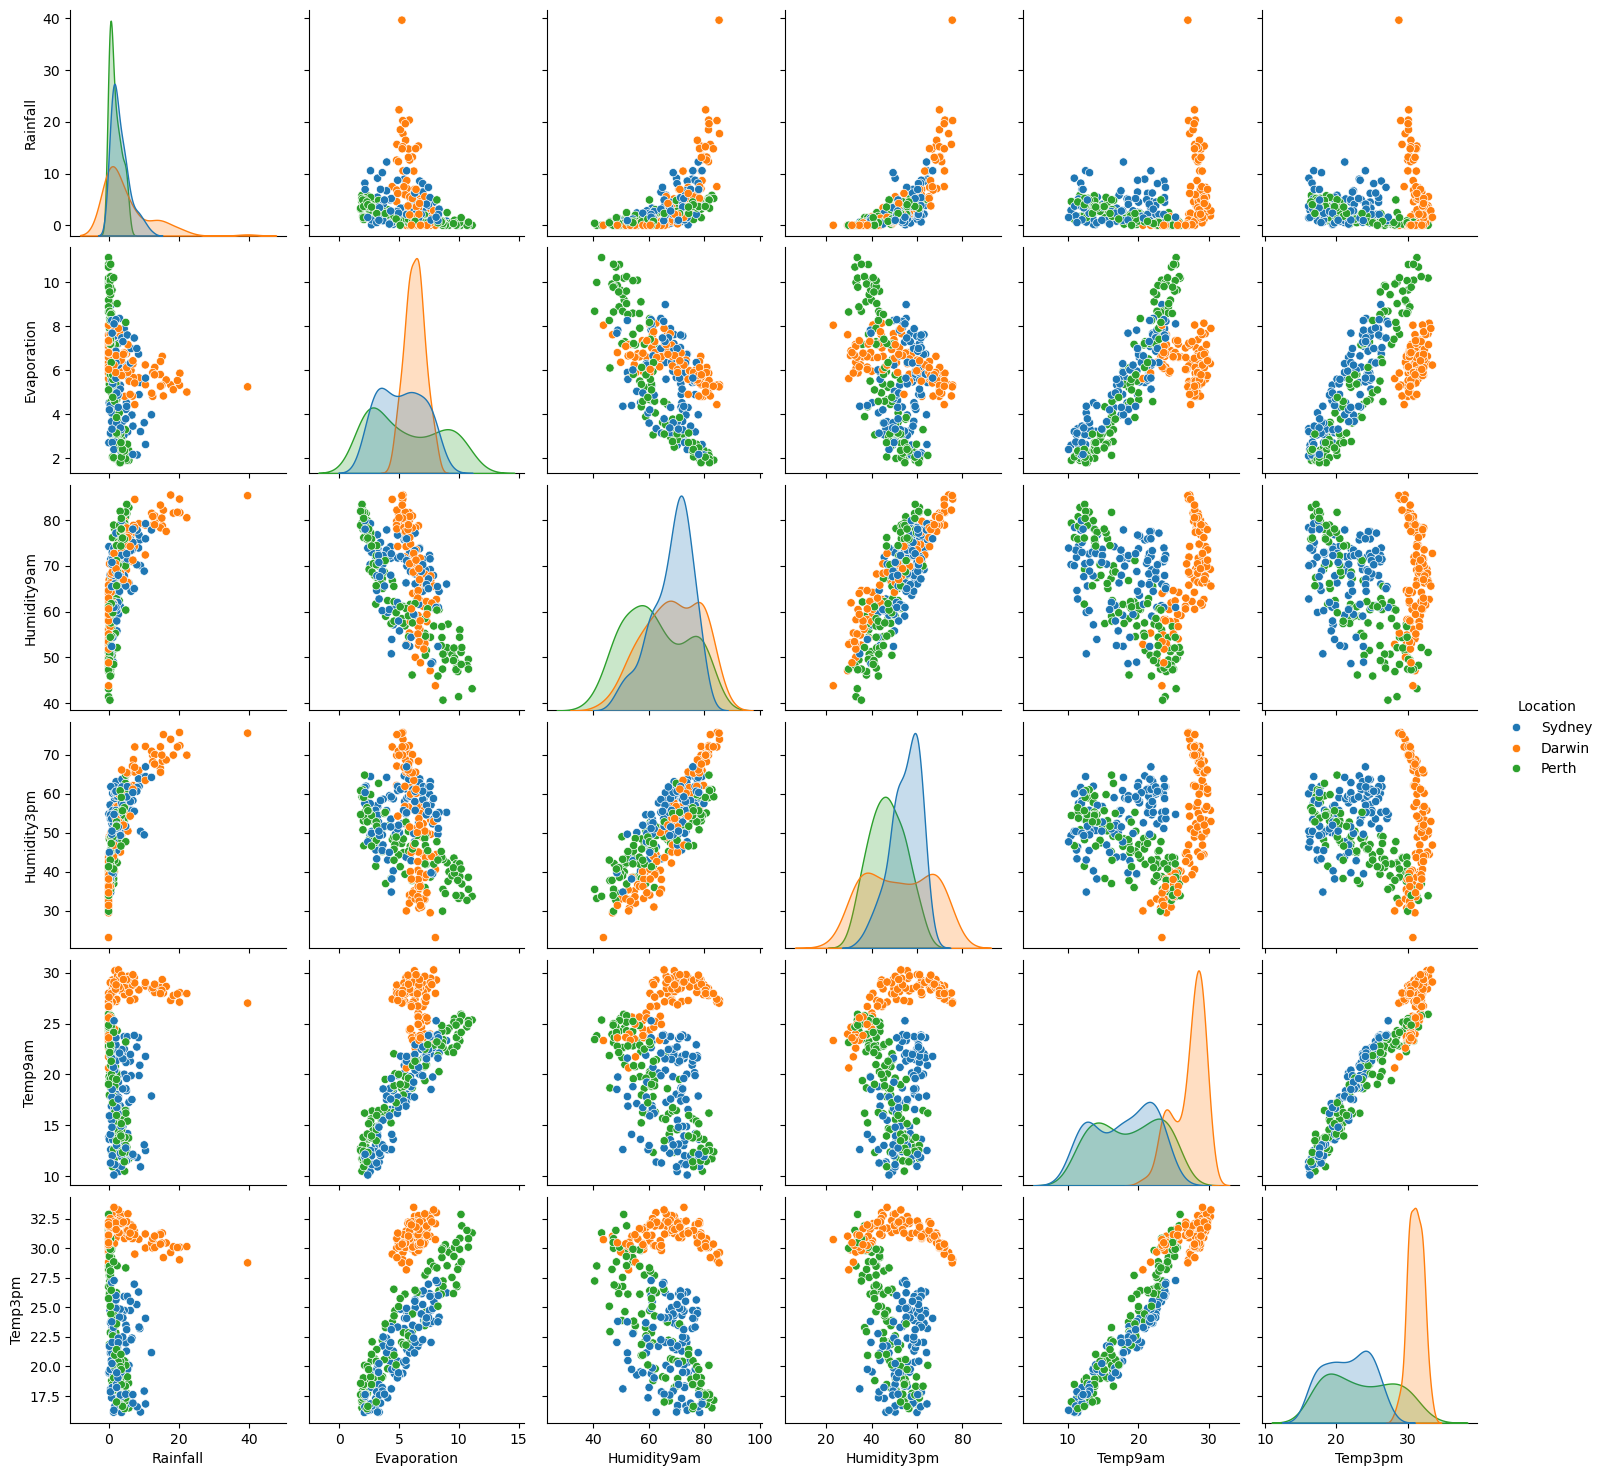

In [9]:
# se agrupa el dataframe por localidad y por mes y se obtienen los promedios mensuales de cada variable
# para ello se ocupan métodos de pandas que son bastante eficientes
df3_vars=df_3c.loc[:,['Date','Location','Rainfall','Evaporation','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
df3_vars_mean=df3_vars.groupby([pd.PeriodIndex(df3_vars['Date'], freq="M"),"Location"])\
[['Rainfall','Evaporation','Humidity9am','Humidity3pm','Temp9am','Temp3pm']].mean().reset_index()
print(df3_vars_mean)
# se grafica el pairplot
sns.pairplot(df3_vars_mean, hue='Location')

Esta última figura revela mucha información valiosa, con relaciones claras entre variables y con clusters de datos entre ciudades. A continuación se descirben las características más importantes a resaltar:
1. Relación directa de la precipitación con las variables de humedad (9am y 3pm). Visualizar las datos promedio diarios (por mes) en lugar de los datos diarios ayudó mucho más a visualizar la relación entre variables. Por otro lado, se puede observar como en Darwin esta relación incluye valores más altos que en las otras ciudades. Que, nuevamente esta relacionado a la mayor humedad en la región debido a su posición geográfica (trópico).
2. Parece que hay una relación lineal de la evaporación respecto a la temperatura (9am y 3pm) en Perth y Sydney, en Darwin no es tan claro.
3. Ambas variables de temperatura y humedad tienen una relación lineal de su variables de las 9am respecto a la de las 3pm. En particular la temperatura de Darwin esta por encima que en las otras ciudades.
4. Hay un cluster muy claro de la humedad respecto a la temperatura en Darwin, con un comportamiento de una curva (habría que ver si hay una función que puede representarla).
5. En todos los casos de la temperatura respecto a otras variables, Darwin se encuentra en un cluster distinto a Perth y Sydney.

### Conclusiones
Despues de diversos análisis, se encontró mucha información valiosa, que incluye el comportamiento anual y la climatología de la precipitación de 3 ciudades en Australia: Perth, Sydney y Darwin.
Se observó como cada ciudad tiene una climatologia distinta, debido principalmente a su ubicación geográfica.
Se observaron relaciones sustanciales entra variables que estan directa o indirectamente relacionadas a la precipitiación. Asimismo se observaron clusters de datos distintos de Darwin respecto a Perth y Sydney, que nos habla de una climatología completamente distinta entre ciudades.